In [11]:
"""
Author:  Cory Padgett
Advisor: Dr. Jeffrey Fung
Email:   cpadge4@clemson.edu
"""

#imports
import numpy as np
import read_penguin as r
import os
from datetime import datetime
import matplotlib.pyplot as plt
import functions_plots as fp
import functions as f


#------------------------------------------------------------------------------
#edit for file check starts here
#------------------------------------------------------------------------------
PATH        = "/scratch/cpadge4/"
DIM         = '2D'    #"2D" or "3D"
IMAX        = 1200    #x dir grid size
JMAX        = 2160    #y dir grid size
KMAX        = 0       #z dir grid size
LABEL       = "h50_2p623E_e40_a-30_b-20_OA_PPM4"
#binary_720x1128x24_h35_1p2J_a-20_b-20_OA_PPM4_01234 - example of full data file name
#------------------------------------------------------------------------------
#edit for file check ends here
#------------------------------------------------------------------------------
time_spacing = []
time_spacing_arrays = []

# Initialize last processed file creation time
last_processed_time = None
new_array_flag = False

#--------------------------------------------------------------------------------
#check files --------------------------------------------------------------------
#--------------------------------------------------------------------------------
info = PATH, DIM, IMAX, JMAX, KMAX
time_spacing_arrays, orbit = f.process_files(LABEL, info)

"""for k in range(0,9999):
    if DIM=='2D':
        exist = r.check_file_exist_2D(PATH, IMAX, JMAX, LABEL, k)
        full_path = PATH+"binary_"+str(IMAX)+"x"+str(JMAX)+"_"+LABEL+"_"+r.frame_num(k)
    
    if DIM=='3D':
        exist = r.check_file_exist_3D(PATH, IMAX, JMAX, KMAX, LABEL, k)
        full_path = PATH+"binary_"+str(IMAX)+"x"+str(JMAX)+"x"+str(KMAX)+"_"+LABEL+"_"+r.frame_num(k)
    
    if exist:
        current_time = os.path.getctime(full_path)
        # Convert timestamp to datetime
        creation_date_time = datetime.fromtimestamp(current_time)
        
        # If last processed time exists, calculate time difference
        if last_processed_time:
            time_difference = current_time - last_processed_time
            # Check if the time difference is greater than 24 hours
            if time_difference > 12 * 3600:  # 24 hours in seconds
                # Start a new array for the range after the gap
                time_spacing_arrays.append(time_spacing)
                time_spacing = []  # Reset time spacing array
                new_array_flag = True
            else:
                # Add time spacing to the list
                time_spacing.append(time_difference)
        
        # Update last processed time
        last_processed_time = current_time
        
        
        # If new array flag is set, add the current file's time spacing to a new array
        if new_array_flag:
            time_spacing.append(current_time)
            new_array_flag = False
    
    else:
        print("Orbit frame does not exists: " +str(k))
        orbits = np.linspace(0,k,k+1)
        time_spacing_arrays.append(time_spacing)
        break"""

Orbit frame does not exists: 301


(0.0, 2000.0)

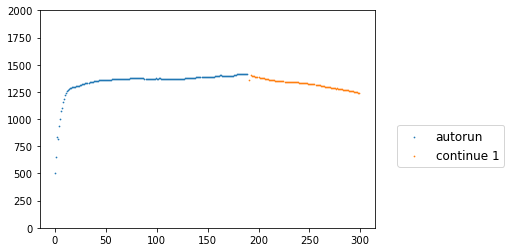

In [12]:
if np.shape(time_spacing_arrays) > (0,):
    plt.scatter(orbits[:len(time_spacing_arrays[0])], time_spacing_arrays[0], s=0.5, label="autorun")
    plt.scatter(orbits[len(time_spacing_arrays[0]):len(time_spacing_arrays[0])+len(time_spacing_arrays[1])], time_spacing_arrays[1], s=0.5, label="continue 1")
    #plt.scatter(orbits[2+len(time_spacing_arrays[0])+len(time_spacing_arrays[1]):], time_spacing, s=0.5, label="continue 2")
else:
    plt.scatter(orbits[1:], time_spacing, s=0.5, label="autorun")
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='upper left', fontsize = fp.legend_size)
plt.ylim(0,2000)

In [3]:
print(np.shape(orbits[:len(time_spacing_arrays[0])]), np.shape(time_spacing_arrays[0]))
#print(274, 1025.6826984882355)
print(np.shape(orbits[len(time_spacing_arrays[0]):len(time_spacing_arrays[0])+len(time_spacing_arrays[1])]), np.shape(time_spacing_arrays[1]))
print(np.shape(orbits[2+len(time_spacing_arrays[0])+len(time_spacing_arrays[1]):]), np.shape(time_spacing))

(275,) (275,)
(8,) (8,)
(17,) (17,)


In [4]:
#------------------------------------------------------------------------------
#edit for file check starts here
#------------------------------------------------------------------------------
PATH        = "/scratch/cpadge4/"
DIM         = '2D'    #"2D" or "3D"
IMAX        = 1200    #x dir grid size
JMAX        = 2160    #y dir grid size
KMAX        = 0       #z dir grid size
LABELS      = ["h20_2p623E_e80_a-10_b-20_OA_PPM4",
               "h20_2p623E_e80_a-20_b-20_OA_PPM4",
               "h20_2p623E_e80_a-30_b-20_OA_PPM4",
               "h35_2p623E_e80_a-10_b-20_OA_PPM4",
               "h35_2p623E_e80_a-20_b-20_OA_PPM4",
               "h35_2p623E_e80_a-30_b-20_OA_PPM4",
               "h50_2p623E_e80_a-10_b-20_OA_PPM4",
               "h50_2p623E_e80_a-20_b-20_OA_PPM4",
               "h50_2p623E_e80_a-30_b-20_OA_PPM4"]
#binary_720x1128x24_h35_1p2J_a-20_b-20_OA_PPM4_01234 - example of full data file name
#------------------------------------------------------------------------------
#edit for file check ends here
#------------------------------------------------------------------------------


# List of file prefixes
file_prefixes = LABELS
time_spacing_arrays = []
orbits = []

info = PATH, DIM, IMAX, JMAX, KMAX
# Iterate over prefixes and process files
for prefix in file_prefixes:
    time_arrays, orbit = f.process_files(prefix, info)
    time_spacing_arrays.append(time_arrays)
    orbits.append(orbit)

Orbit frame does not exists: 301
Orbit frame does not exists: 301
Orbit frame does not exists: 81
Orbit frame does not exists: 301
Orbit frame does not exists: 301
Orbit frame does not exists: 299
Orbit frame does not exists: 301
Orbit frame does not exists: 301
Orbit frame does not exists: 299


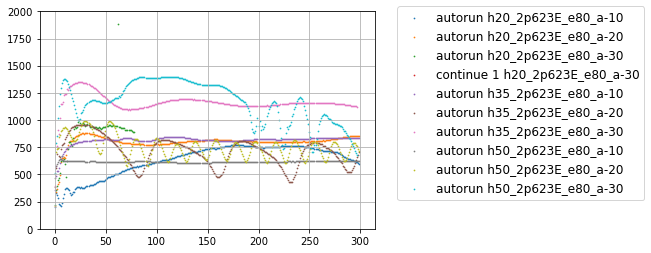

In [5]:
for i in range(len(LABELS)):
    plt.scatter(orbits[i][:len(time_spacing_arrays[i][0])], time_spacing_arrays[i][0], s=0.5, label="autorun "+LABELS[i][:-13])
    if len(time_spacing_arrays[i]) > 1:
        for j in range(1,len(time_spacing_arrays[i])):
            plt.scatter(orbits[i][len(time_spacing_arrays[i][0]):-2], time_spacing_arrays[i][j], s=0.5, label="continue "+str(j)+" "+LABELS[i][:-13])
plt.ylim(0,2000)
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1.05), loc='upper left', fontsize = fp.legend_size)